## Importing necessary modules

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns,plotly.express as px, warnings

warnings.filterwarnings('ignore')

## Loading data

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Insight: There are 418 data in total.

## Checking for duplicate values

In [5]:
df.duplicated().sum()

0

Insight: No duplicate data is there.

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Insight: There are 86 missing data in Age, 1 missing data in Fare and 327 missing data in Cabin. Due to having lots of missing data in Cabin, it not that much useful in analysis.

In [7]:
df1 = df.copy()

In [8]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Dropping unwanted columns for correlation analysis.

In [9]:
df1.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

## Filling the missing values

In [10]:
df1['Age'].fillna(df1['Age'].mode().mean(), inplace=True)
df1['Fare'].fillna(df1['Fare'].mean(), inplace=True)

In [11]:
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [13]:
df1['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

#### Encoding categorical data for correlation analysis

In [14]:
df1['Embarked'].replace({
    'Q':0,
    'S':1,
    'C':2
}, inplace=True)
df1['Sex'].replace({
    'male':1,
    'female':0
}, inplace= True)

## Correlation among the features

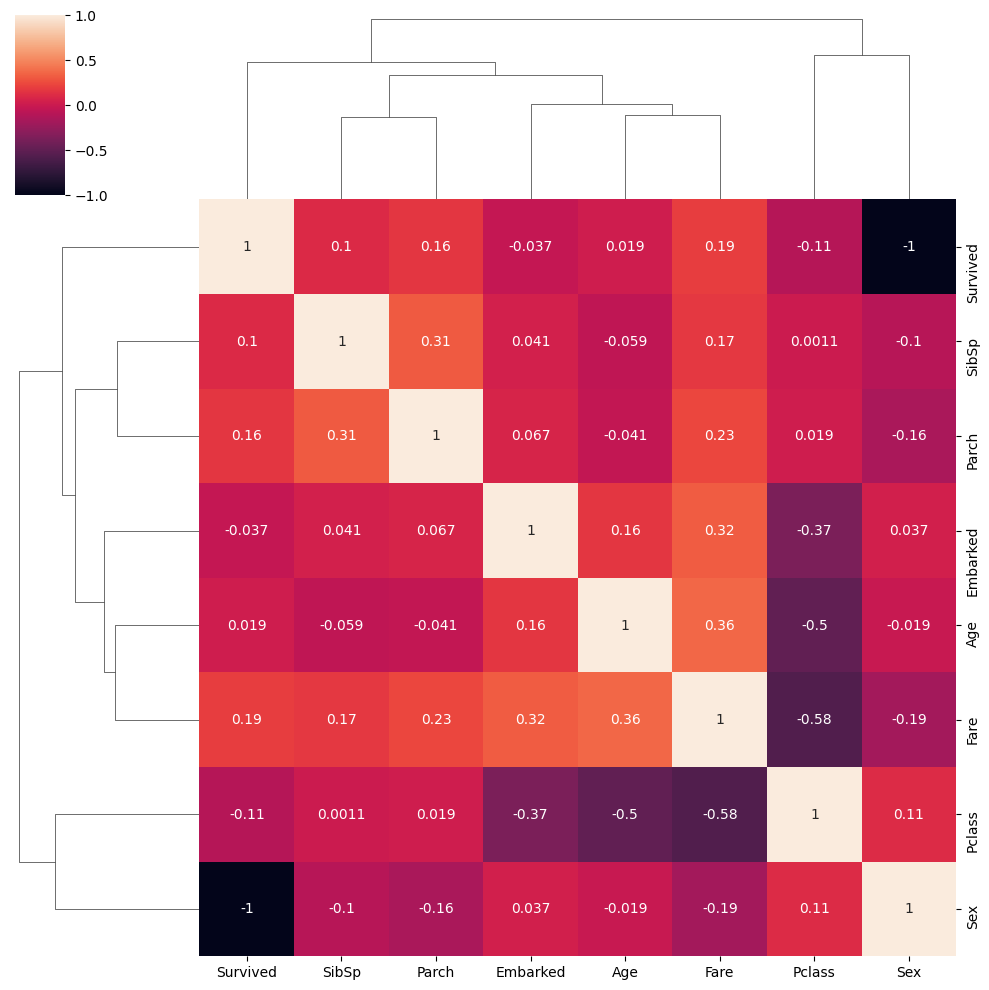

In [15]:
sns.clustermap(df1.corr(), annot=True)

Insight: Pclass column has good correlation with Embarked, Age and Fare.

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
classwise_group = [df['Fare'][df['Pclass'] == i].count() for i in df['Pclass'].unique()]


In [20]:
classwise_group

[217, 93, 107]

In [21]:
df['Pclass'].unique()

array([3, 2, 1], dtype=int64)

Text(0.5, 1.0, 'Class wise passengers split up')

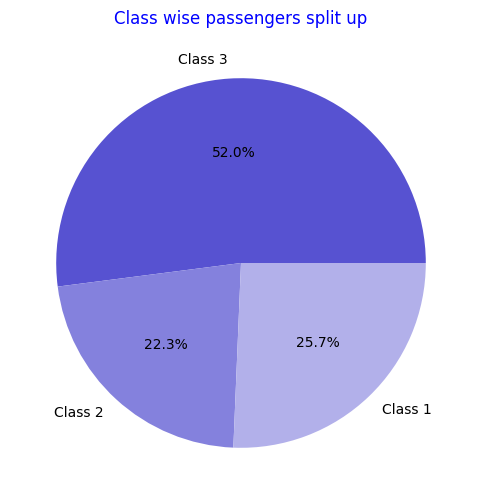

In [22]:
plt.figure(figsize=(8, 6))
plt.pie(classwise_group, labels=['Class 3', 'Class 2', 'Class 1'], colors =['#5752D1', '#8481DD', '#B2B0EA'], autopct='%1.1f%%')
plt.title("Class wise passengers split up", color='blue')

In [23]:
df['Fare'][df['Fare'] == 0].count()

2

Insight: 52% of the passengers are of class 3, 22.3% are from class 2 and 25.7% are of class 1. 2 passengers are there who have not paid for the journey.

Text(1.0, 1.0, 'Age - Sex relationship')

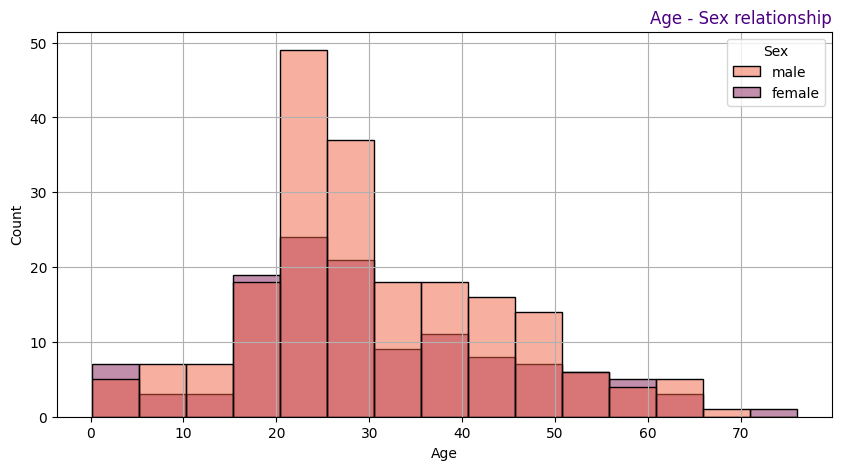

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Sex', palette='rocket_r')
plt.grid(zorder = 0)
plt.title("Age - Sex relationship", loc='right', color = 'indigo')


Insight: Passengers of age group 20-30 is travelling the most. Most of the passengers are male. The oldest passenger of this trip is a lady.

Text(1.0, 1.0, 'Age - Class - Fare Relation')

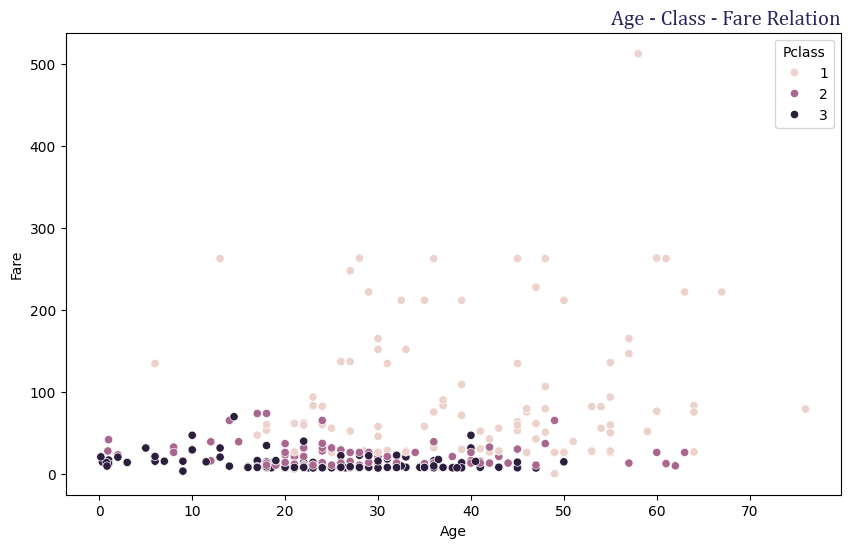

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='Age', y='Fare', hue='Pclass')
plt.title("Age - Class - Fare Relation", font='Cambria', fontsize=15, color='#2A265F', loc='right')

Insight: All class 3 passengers are within the age of 50.

Few of class 2 passengers are above 50.

Most of the passengers above 50 are class 1 passengers.

Text(1.0, 1.0, 'Passenger class wise survival visual')

<Figure size 1000x400 with 0 Axes>

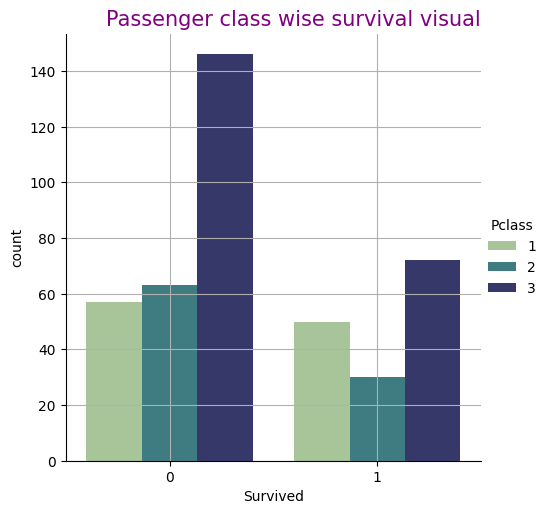

In [25]:
plt.figure(figsize=(10,4))
sns.catplot(df, x="Survived", kind='count',hue='Pclass', palette='crest')
plt.grid(zorder=0)
plt.title("Passenger class wise survival visual", color='purple', loc='right', fontsize=15, fontweight=True)

Insight: Survival ratio of class 1 passengers is best.